In [46]:
import pandas as pd
train = pd.read_csv('./실습데이터/titanic_train.csv')
test = pd.read_csv('./실습데이터/titanic_test.csv')

In [47]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [48]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [49]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [50]:
#결측치를 파악한다.
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [51]:
#결측지를 파악한다
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [52]:
#데이터를 시각화해서 의미를 파악한다.
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [53]:
train.sample(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
168,169,0,1,"Baumann, Mr. John D",male,NaN,0,0,PC 17318,25.925,NaN,S


In [54]:
train[train['Survived']==1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [55]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']
    #seaborn 그래프가 더 이쁜데 seaborn 그래프는 기본적으로 pandas로 던져야 그릴 수 있음
    df.plot(kind='bar', stacked=True, figsize=(10,5))

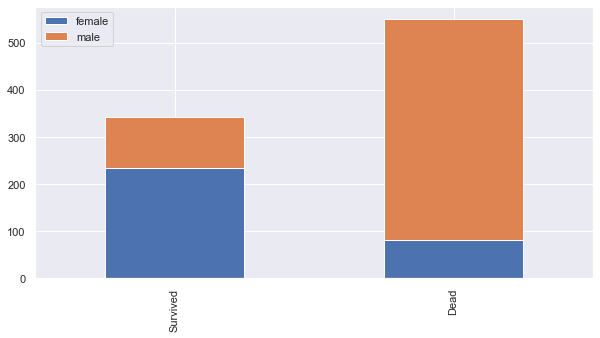

In [56]:
bar_chart('Sex')

In [57]:
train[train['Survived']==1]['Sex'].value_counts()

female    233
male      109
Name: Sex, dtype: int64

In [58]:
female, male= train[train['Survived']==1]['Sex'].value_counts()

In [59]:
female

233

In [60]:
male

109

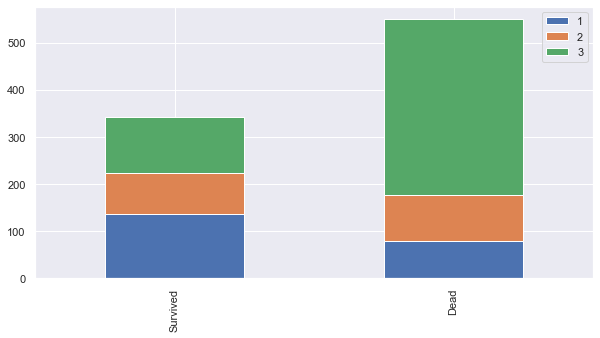

In [61]:
bar_chart('Pclass')

In [62]:
temp = train[train['Survived']==1]['Pclass'].value_counts()

In [63]:
len(temp)

3

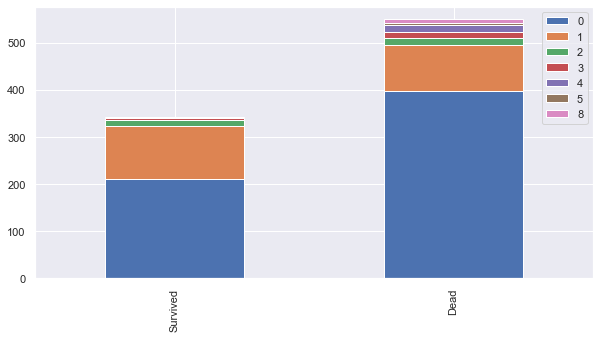

In [64]:
bar_chart('SibSp')

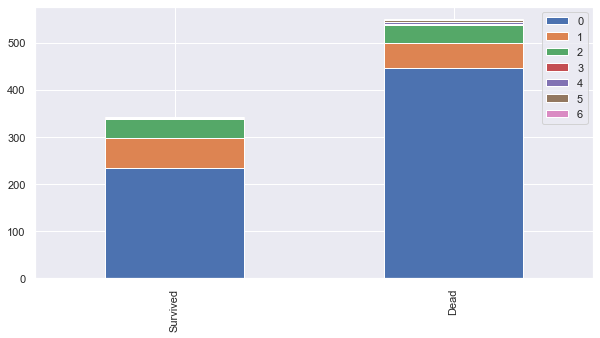

In [65]:
bar_chart('Parch')

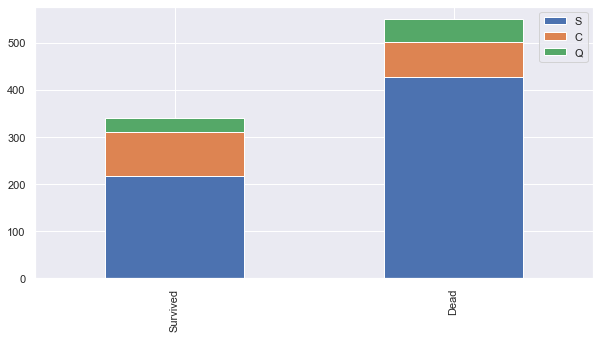

In [66]:
bar_chart('Embarked')

In [67]:
#나이 결측치를 채우기 위한 기법
#이름을 보니 Mr, Miss, Master 등이 있어 이 정보를 활용하면 좋겠다

train_test_data = [train, test]
for dataset in train_test_data:
    dataset['Title']=dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [68]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Don           1
Lady          1
Jonkheer      1
Ms            1
Countess      1
Capt          1
Sir           1
Mme           1
Name: Title, dtype: int64

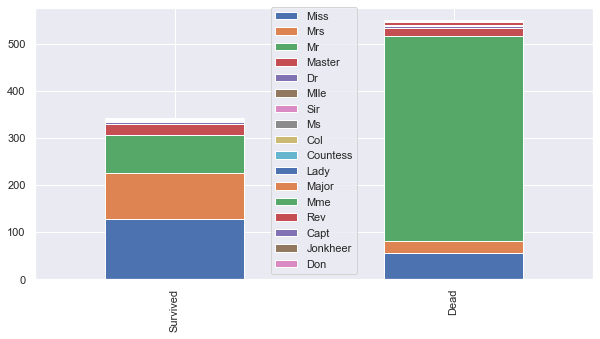

In [69]:
bar_chart('Title')

In [70]:
#binning 기법을 활용합시다.
title_mapping = {'Mr': 0, 'Miss': 1, 'Mrs' : 2,
                'Master': 3, 'Dr' : 3, 'Rev' : 3, 'Col' : 3, 'Major': 3, 'Mile':3, 'Countess' : 3,\
                'Ms' : 3, 'Lady' : 3, 'Jonkheer' : 3, 'Don' : 3, 'Dona' : 3, 'Mne':3, 'Capt':3, 'Sir':3}
train_test_data = [train, test]
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

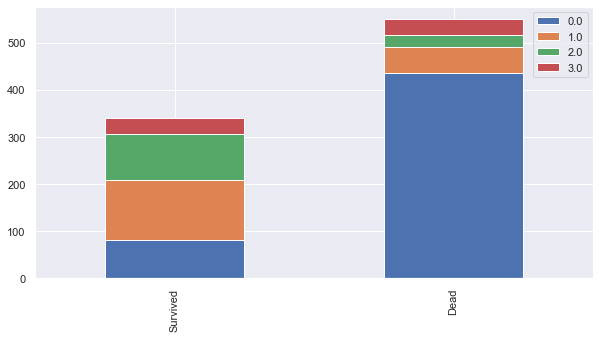

In [71]:
bar_chart('Title')

In [72]:
train.drop('Name', axis=1, inplace=True)

In [73]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0.0


In [74]:
test.drop('Name', axis=1, inplace=True)

In [77]:
sex_mapping = { 'female' : 0, 'male' : 1}
train_test_data = [train, test]
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

In [78]:
train.sample(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
157,158,0,3,1,30.0,0,0,SOTON/OQ 392090,8.0500,NaN,S,0.0
746,747,0,3,1,16.0,1,1,C.A. 2673,20.2500,NaN,S,0.0
309,310,1,1,0,30.0,0,0,PC 17485,56.9292,E36,C,1.0
67,68,0,3,1,19.0,0,0,S.P. 3464,8.1583,NaN,S,0.0
608,609,1,2,0,22.0,1,2,SC/Paris 2123,41.5792,NaN,C,2.0
115,116,0,3,1,21.0,0,0,STON/O 2. 3101294,7.9250,NaN,S,0.0
49,50,0,3,0,18.0,1,0,349237,17.8000,NaN,S,2.0
827,828,1,2,1,1.0,0,2,S.C./PARIS 2079,37.0042,NaN,C,3.0
175,176,0,3,1,18.0,1,1,350404,7.8542,NaN,S,0.0
672,673,0,2,1,70.0,0,0,C.A. 24580,10.5000,NaN,S,0.0


In [80]:
#age 값을 title 묶어서 median 값으로 처리하기
train['Age'].fillna(train.groupby('Title')['Age'].transform('median'), inplace=True)
test['Age'].fillna(test.groupby('Title')['Age'].transform('median'), inplace=True)

In [81]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,0,38.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,0,35.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,1,35.0,0,0,373450,8.0500,NaN,S,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,211536,13.0000,NaN,S,3.0
887,888,1,1,0,19.0,0,0,112053,30.0000,B42,S,1.0
888,889,0,3,0,21.0,1,2,W./C. 6607,23.4500,NaN,S,1.0
889,890,1,1,1,26.0,0,0,111369,30.0000,C148,C,0.0


In [82]:
test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,1,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,0,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,1,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,1,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,0,22.0,1,1,3101298,12.2875,NaN,S,2
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,1,28.5,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,0,39.0,0,0,PC 17758,108.9000,C105,C,3
415,1307,3,1,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,1,28.5,0,0,359309,8.0500,NaN,S,0
